# STEP 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# STEP 2: Upload Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_1000_orders.csv to sales_data_1000_orders.csv


# STEP 3: Load Dataset

In [ ]:
df = pd.read_csv("sales_data_1000_orders.csv")

print("First 5 Rows:")
print(df.head())

First 5 Rows:
   Order_ID        Date   Product     Category Region  Quantity  Price  \
0      1001  2024-01-01   Monitor  Accessories   East         4   3000   
1      1002  2024-01-02   Printer  Electronics  South         5  12000   
2      1003  2024-01-03  Keyboard  Accessories   West         4   3000   
3      1004  2024-01-04   Printer  Accessories  South         2    500   
4      1005  2024-01-05   Printer  Electronics  South         4  12000   

   Revenue  
0    12000  
1    60000  
2    12000  
3     1000  
4    48000  


# STEP 4: Basic Info

In [ ]:
print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order_ID  1000 non-null   int64 
 1   Date      1000 non-null   object
 2   Product   1000 non-null   object
 3   Category  1000 non-null   object
 4   Region    1000 non-null   object
 5   Quantity  1000 non-null   int64 
 6   Price     1000 non-null   int64 
 7   Revenue   1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB

Statistical Summary:
          Order_ID     Quantity         Price        Revenue
count  1000.000000  1000.000000   1000.000000    1000.000000
mean   1500.500000     3.065000  15535.500000   48647.000000
std     288.819436     1.423658  18950.015642   70002.333659
min    1001.000000     1.000000    500.000000     500.000000
25%    1250.750000     2.000000   1500.000000    3000.000000
50%    1500.500000     3.000000   3000.000000   12000.000000


# STEP 5: Data Cleaning


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

print("\nData Shape After Cleaning:", df.shape)


Data Shape After Cleaning: (1000, 8)


🔥 IMPORTANT FIX — DATE COLUMN
#  Your column name is "Date"

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Create Month & Year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


# PART 1: Monthly Revenue Trend


Monthly Revenue:
Month
1     4014500
2     3808000
3     3966500
4     5444500
5     5288000
6     4226500
7     4862000
8     3096000
9     3528000
10    2472500
11    3903500
12    4037000
Name: Revenue, dtype: int64


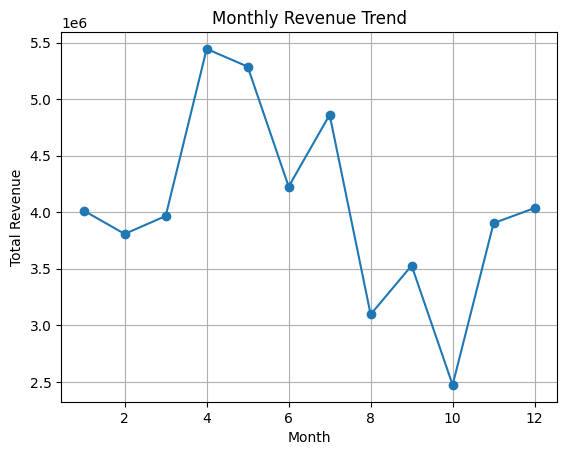

In [ ]:
monthly_sales = df.groupby('Month')['Revenue'].sum()
print("\nMonthly Revenue:")
print(monthly_sales)

plt.figure()
monthly_sales.plot(marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

# PART 2: Yearly Revenue Trend


Yearly Revenue:
Year
2024    18860500
2025    16893000
2026    12893500
Name: Revenue, dtype: int64


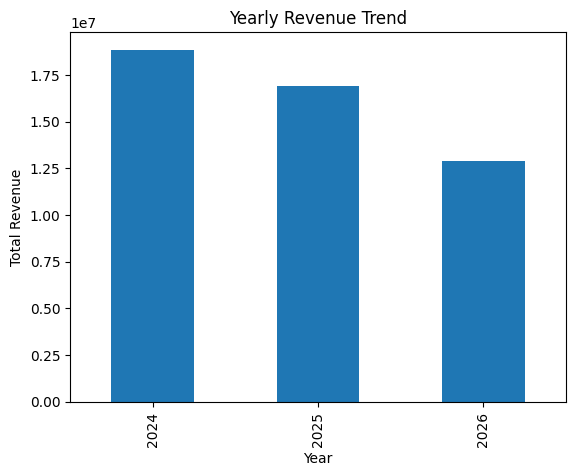

In [ ]:
yearly_sales = df.groupby('Year')['Revenue'].sum()
print("\nYearly Revenue:")
print(yearly_sales)

plt.figure()
yearly_sales.plot(kind='bar')
plt.title("Yearly Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.show()

# PART 3: Best-Selling Products


Top Selling Products:
Product
Monitor       9702500
Printer       8679500
Laptop        8150500
Keyboard      8110500
Mouse         7159500
Headphones    6844500
Name: Revenue, dtype: int64


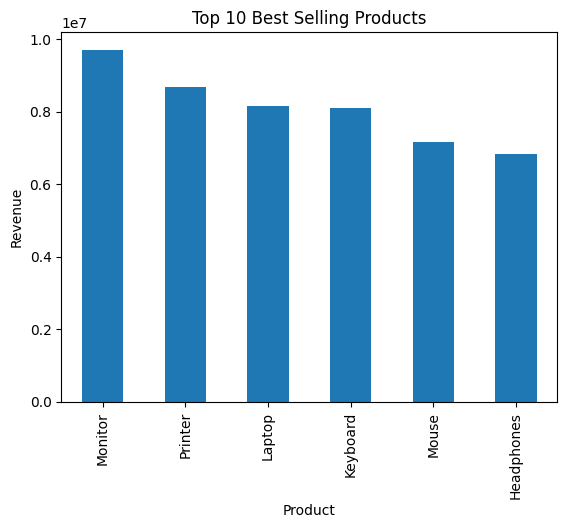

In [ ]:
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
print("\nTop Selling Products:")
print(top_products.head(10))

plt.figure()
top_products.head(10).plot(kind='bar')
plt.title("Top 10 Best Selling Products")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()


# PART 4: Revenue by Region



Revenue by Region:
Region
East     12179000
North    12746500
South    12197500
West     11524000
Name: Revenue, dtype: int64


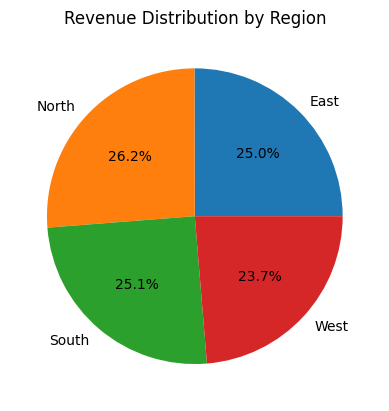


✅ Sales Analysis Completed Successfully!


In [ ]:
region_sales = df.groupby('Region')['Revenue'].sum()
print("\nRevenue by Region:")
print(region_sales)

plt.figure()
region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Revenue Distribution by Region")
plt.ylabel("")
plt.show()

print("\n✅ Sales Analysis Completed Successfully!")

# 1. Profit Analysis

# We’ll assume Profit = Revenue − Cost
# If cost not given, we estimate cost as 60% of price

In [ ]:
# Estimate Cost (60% of price)
df['Cost'] = df['Price'] * 0.6

# Profit per order
df['Profit'] = df['Revenue'] - (df['Cost'] * df['Quantity'])

print("\nSample Profit Data:")
print(df[['Product', 'Revenue', 'Profit']].head())

# Total Profit
total_profit = df['Profit'].sum()
print("\nTotal Profit:", total_profit)



Sample Profit Data:
    Product  Revenue   Profit
0   Monitor    12000   4800.0
1   Printer    60000  24000.0
2  Keyboard    12000   4800.0
3   Printer     1000    400.0
4   Printer    48000  19200.0

Total Profit: 19458800.0


# Profit by Product

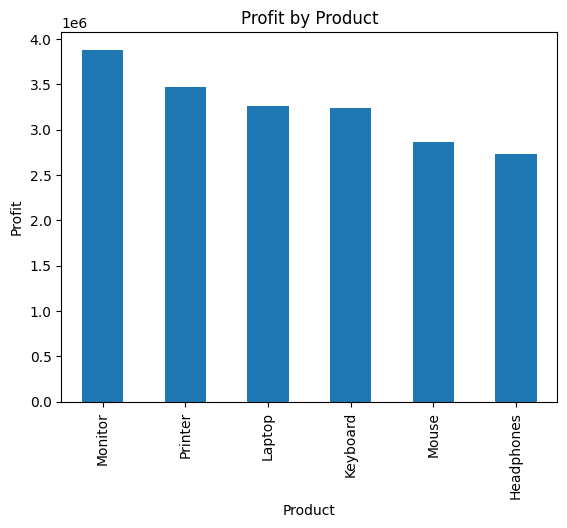

In [ ]:
profit_product = df.groupby('Product')['Profit'].sum().sort_values(ascending=False)

plt.figure()
profit_product.plot(kind='bar')
plt.title("Profit by Product")
plt.ylabel("Profit")
plt.show()


# 2. Category Performance


Revenue by Category:
Category
Accessories    23478000
Electronics    25169000
Name: Revenue, dtype: int64


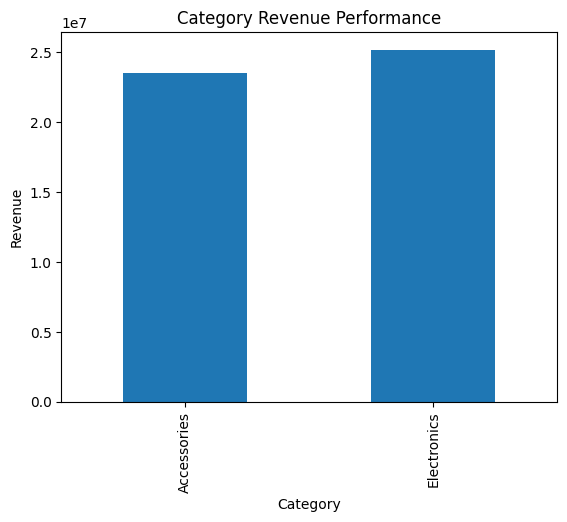

In [ ]:
category_sales = df.groupby('Category')['Revenue'].sum()

print("\nRevenue by Category:")
print(category_sales)

plt.figure()
category_sales.plot(kind='bar')
plt.title("Category Revenue Performance")
plt.ylabel("Revenue")
plt.show()


# 3. Monthly Growth Rate

# This shows how fast business grows.


Monthly Growth Rate (%):
Year  Month
2024  1               NaN
      2        110.689837
      3        -41.139715
      4         86.794055
      5        -24.278245
      6         15.791054
      7        -11.122634
      8        -49.154026
      9         35.054504
      10        -8.156330
      11        94.172063
      12        -4.859457
Name: Revenue, dtype: float64


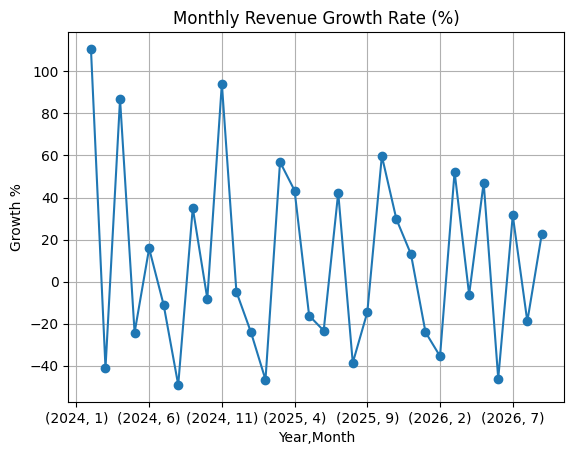

In [ ]:
monthly_revenue = df.groupby(['Year','Month'])['Revenue'].sum()

# Calculate % growth
growth = monthly_revenue.pct_change() * 100

print("\nMonthly Growth Rate (%):")
print(growth.head(12))

plt.figure()
growth.plot(marker='o')
plt.title("Monthly Revenue Growth Rate (%)")
plt.ylabel("Growth %")
plt.grid()
plt.show()


# ADD THIS AT THE END OF YOUR CODE

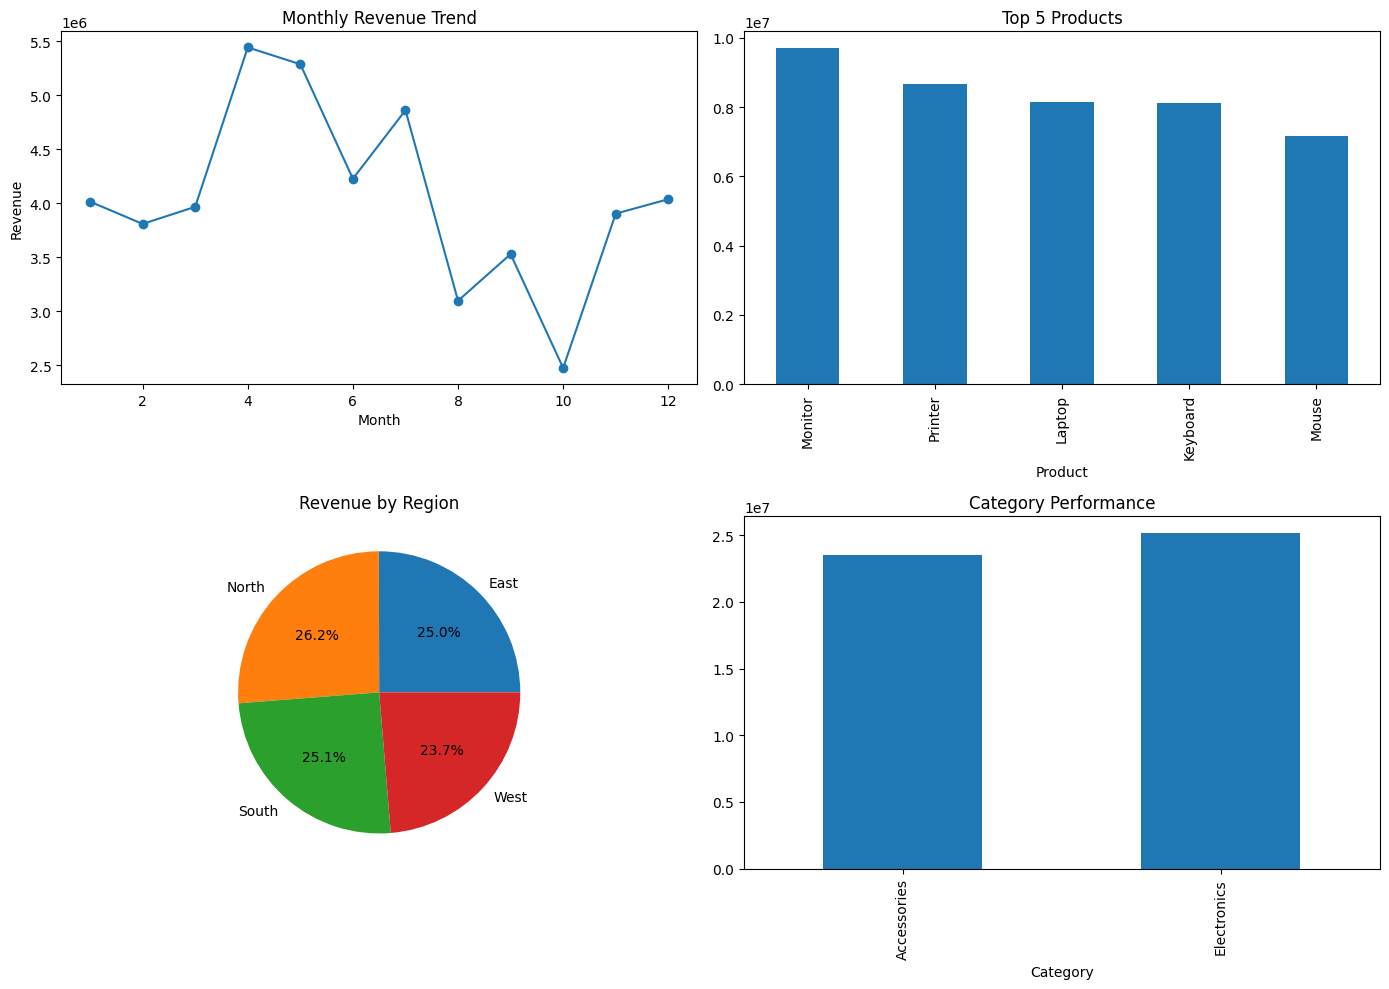

In [ ]:
# ==========================================
# FINAL DASHBOARD VIEW
# ==========================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1️⃣ Monthly Revenue Trend
monthly_sales.plot(ax=axes[0,0], marker='o')
axes[0,0].set_title("Monthly Revenue Trend")
axes[0,0].set_xlabel("Month")
axes[0,0].set_ylabel("Revenue")

# 2️⃣ Top Products
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title("Top 5 Products")

# 3️⃣ Region Revenue
region_sales = df.groupby('Region')['Revenue'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', ax=axes[1,0])
axes[1,0].set_title("Revenue by Region")
axes[1,0].set_ylabel("")

# 4️⃣ Category Revenue
category_sales = df.groupby('Category')['Revenue'].sum()
category_sales.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title("Category Performance")

plt.tight_layout()
plt.show()


# SALES FORECASTING (Future Prediction)

# Step 1: Prepare Monthly Revenue Data

In [ ]:
# Combine Year & Month into date format
df['YearMonth'] = df['Date'].dt.to_period('M')

monthly_revenue = df.groupby('YearMonth')['Revenue'].sum()

# Convert to datetime index
monthly_revenue.index = monthly_revenue.index.to_timestamp()

print(monthly_revenue.head())


YearMonth
2024-01-01     949500
2024-02-01    2000500
2024-03-01    1177500
2024-04-01    2199500
2024-05-01    1665500
Freq: MS, Name: Revenue, dtype: int64


# Step 2: Plot Original Monthly Revenue

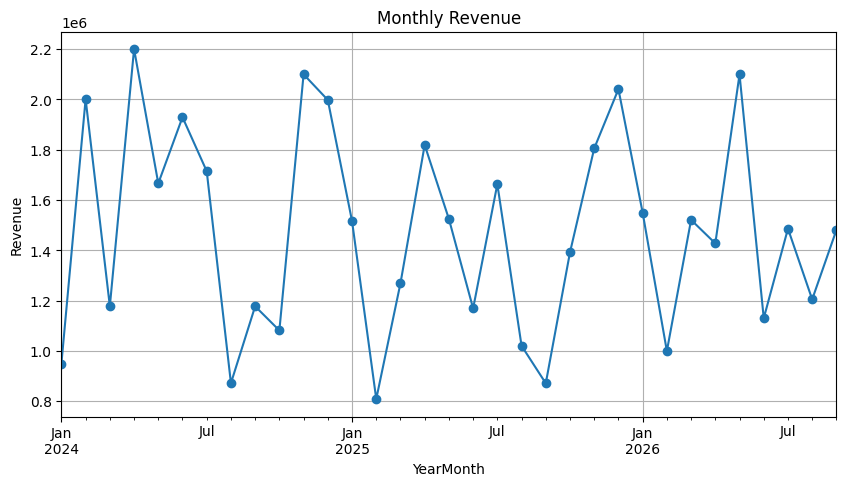

In [ ]:
plt.figure(figsize=(10,5))
monthly_revenue.plot(marker='o')
plt.title("Monthly Revenue")
plt.ylabel("Revenue")
plt.grid()
plt.show()


# Step 3: Forecast Using Moving Average

# We take average of last 3 months to predict next month.

In [ ]:
forecast_periods = 3  # Predict next 3 months

moving_avg = monthly_revenue.rolling(window=3).mean()

last_date = monthly_revenue.index[-1]

future_dates = pd.date_range(start=last_date, periods=forecast_periods+1, freq='M')[1:]

forecast_values = [moving_avg.iloc[-1]] * forecast_periods

forecast_series = pd.Series(forecast_values, index=future_dates)


/tmp/ipython-input-3618613487.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=forecast_periods+1, freq='M')[1:]


# Step 4: Plot Forecast

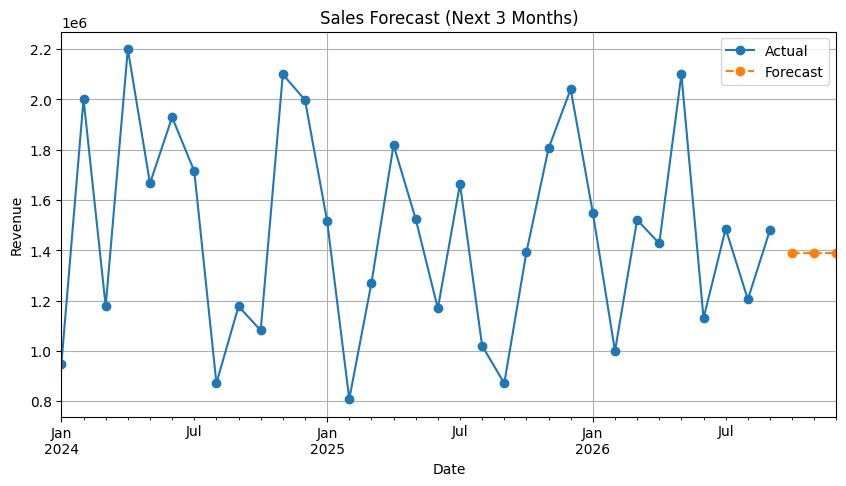

In [ ]:
plt.figure(figsize=(10,5))
monthly_revenue.plot(label='Actual', marker='o')
forecast_series.plot(label='Forecast', linestyle='--', marker='o')

plt.title("Sales Forecast (Next 3 Months)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid()
plt.show()
